In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from beakerx import *

### Import data

In [2]:
DATADIR = os.path.join(os.getenv("DATA_DIR"), 'processed_journey')
DATADIR

'/Volumes/GoogleDrive/Team Drives/GOV.UK teams/2018-2019/Q3/Knowledge up Q3/Data science/data/processed_journey'

In [3]:
journeys = pd.read_csv(os.path.join(DATADIR, "doo_prelim_meta_standard_with_pageseq_from_29-10_to_03-11-2018.csv.gz"), compression='gzip')

In [4]:
journeys.shape

(1722287, 16)

In [5]:
journeys.head(10)

,Sequence,PageSequence,Occurrences,Page_Seq_Occurrences,DeviceCategories,Dates,Page_Event_List,Page_List,PageSequence_internal,Event_List,num_event_cats,Event_cats_agg,Event_cat_act_agg,Page_List_NL,Page_Seq_NL,Occurrences_NL
0,/guidance/rates-and-thresholds-for-employers-2...,/guidance/rates-and-thresholds-for-employers-2...,77,284.0,"[('desktop', 59), ('mobile', 9), ('tablet', 9)]","[('20181031', 33), ('20181029', 27), ('2018110...",[('/guidance/rates-and-thresholds-for-employer...,['/guidance/rates-and-thresholds-for-employers...,/guidance/rates-and-thresholds-for-employers-2...,"[('PAGE_NULL', 'PAGE_NULL')]",1,"[('PAGE_NULL', 1)]","[(('PAGE_NULL', 'PAGE_NULL'), 1)]",['/guidance/rates-and-thresholds-for-employers...,/guidance/rates-and-thresholds-for-employers-2...,4930.0
1,/sure-start-maternity-grant/how-to-claim<<PAGE...,/sure-start-maternity-grant/how-to-claim>>/gov...,89,331.0,"[('mobile', 43), ('desktop', 43), ('tablet', 3)]","[('20181031', 34), ('20181029', 31), ('2018110...","[('/sure-start-maternity-grant/how-to-claim', ...","['/sure-start-maternity-grant/how-to-claim', '...",/sure-start-maternity-grant/how-to-claim>>/gov...,"[('PAGE_NULL', 'PAGE_NULL'), ('PAGE_NULL', 'PA...",3,"[('PAGE_NULL', 2), ('External Link Clicked', 1...","[(('PAGE_NULL', 'PAGE_NULL'), 2), (('External ...","['/sure-start-maternity-grant/how-to-claim', '...",/sure-start-maternity-grant/how-to-claim>>/gov...,5408.0
2,/historic-vehicles/apply-for-vehicle-tax-exemp...,/historic-vehicles/apply-for-vehicle-tax-exemp...,96,306.0,"[('mobile', 56), ('desktop', 30), ('tablet', 10)]","[('20181031', 35), ('20181029', 25), ('2018110...",[('/historic-vehicles/apply-for-vehicle-tax-ex...,['/historic-vehicles/apply-for-vehicle-tax-exe...,/historic-vehicles/apply-for-vehicle-tax-exemp...,"[('PAGE_NULL', 'PAGE_NULL')]",1,"[('PAGE_NULL', 1)]","[(('PAGE_NULL', 'PAGE_NULL'), 1)]",['/historic-vehicles/apply-for-vehicle-tax-exe...,/historic-vehicles/apply-for-vehicle-tax-exemp...,1536.0
3,/government-gateway<<PAGE<:<NULL<:<NULL,/government-gateway,1138,8909.0,"[('mobile', 463), ('tablet', 119), ('desktop',...","[('20181031', 376), ('20181029', 413), ('20181...","[('/government-gateway', 'PAGE<:<NULL<:<NULL')]",['/government-gateway'],/government-gateway,"[('PAGE_NULL', 'PAGE_NULL')]",1,"[('PAGE_NULL', 1)]","[(('PAGE_NULL', 'PAGE_NULL'), 1)]",['/government-gateway'],/government-gateway,628989.0
4,/guidance/passport-rules-for-travel-to-europe-...,/guidance/passport-rules-for-travel-to-europe-...,57,11214.0,"[('desktop', 47), ('tablet', 10)]","[('20181031', 33), ('20181029', 6), ('20181102...",[('/guidance/passport-rules-for-travel-to-euro...,['/guidance/passport-rules-for-travel-to-europ...,/guidance/passport-rules-for-travel-to-europe-...,"[('user_satisfaction_survey', 'banner_shown'),...",2,"[('user_satisfaction_survey', 1), ('PAGE_NULL'...","[(('user_satisfaction_survey', 'banner_shown')...",['/guidance/passport-rules-for-travel-to-europ...,/guidance/passport-rules-for-travel-to-europe-...,550475.0
5,/claim-national-insurance-refund<<PAGE<:<NULL<...,/claim-national-insurance-refund,143,437.0,"[('desktop', 50), ('mobile', 88), ('tablet', 5)]","[('20181031', 35), ('20181029', 65), ('2018110...","[('/claim-national-insurance-refund', 'PAGE<:<...",['/claim-national-insurance-refund'],/claim-national-insurance-refund,"[('PAGE_NULL', 'PAGE_NULL')]",1,"[('PAGE_NULL', 1)]","[(('PAGE_NULL', 'PAGE_NULL'), 1)]",['/claim-national-insurance-refund'],/claim-national-insurance-refund,1770.0
6,/government/collections/data-protection-act-20...,/government/collections/data-protection-act-20...,94,531.0,"[('mobile', 12), ('desktop', 80), ('tablet', 2)]","[('20181031', 33), ('20181029', 39), ('2018110...",[('/government/collections/data-protection-act...,['/government/collections/data-protection-act-...,/government/collections/data-protection-act-20...,"[('PAGE_NULL', 'PAGE_NULL'), ('navDocumentColl...",3,"[('PAGE_NULL', 2), ('navDocumentCollectionLink...","[(('PAGE_NULL', 'PAGE_NULL

### Sample data for speed

In [6]:
journeys = journeys.sample(frac=0.2, random_state=1234).copy()

In [7]:
journeys.shape

(344457, 16)

### derive variables (create features...)

In [8]:
journeys['page_list_eval'] = journeys['Page_List'].map(pd.eval)
journeys['page_seq_len'] = journeys['page_list_eval'].map(len)

In [9]:
# def contains_search(Page_List):
#     search_in_sequence = 0
#     thelist  = pd.eval(Page_List)
    
#     for page in thelist:
#         if ('/search?' in page) or ('/search/' in page):
#             search_in_sequence = 1
            
#     return search_in_sequence

# def count_search(Page_List):
#     times_search_in_sequence = 0
#     thelist  = pd.eval(Page_List)
    
#     for page in thelist:
#         if ('/search?' in page) or ('/search/' in page):
#             times_search_in_sequence += 1
#     return times_search_in_sequence


# # journeys['contains_search'] = list(map(contains_search, journeys['Page_List']))

# journeys['count_search'] = list(map(count_search, journeys['Page_List']))

In [10]:
journeys['count_search'] = journeys.PageSequence.str.count("/search?")+journeys.PageSequence.str.count("/search/")

In [11]:
journeys['contains_search_regex'] = np.where((journeys.PageSequence.str.contains("/search?")) | (journeys.PageSequence.str.contains("/search/")), 1, 0)

Get differnet results when using the contains_search function iterating over pagelist to the regex function in PageSequence. It would be good to understand why. 

In [12]:
journeys['contains_search_n'] = journeys['contains_search_regex']*journeys['Page_Seq_Occurrences']

In [15]:
def get_end_page(Page_List):          
    return pd.eval(Page_List)[-1]

journeys['final_page'] = journeys['Page_List'].map(get_end_page)

In [ ]:
x = '[('desktop', 59), ('mobile', 9), ('tablet', 9)]'
if x[0][0] =='desktop':
    print(x[0][1])
else:
    print('no')

a, b, c, = count_desktop(x)

In [41]:
def count_desktop(DeviceCategories): 
    thelist  = pd.eval(DeviceCategories)
    desktop = 0
    mobile = 0
    other = 0
    for i in range(len(thelist)):
        if thelist[i][0] =='desktop':
            desktop = thelist[i][1]
        elif thelist[i][0] =='mobile':
            mobile = thelist[i][1]
        else:
            other = thelist[i][1]      
    return desktop, mobile, other

In [42]:
journeys['desktop'], journeys['mobile'], journeys['other_device'] = zip(*journeys['DeviceCategories'].map(count_desktop))

In [46]:
journeys['more_desktop'] = np.where(journeys['desktop'] > (journeys['mobile']+journeys['other_device']), 1, 0)

more_desktop
0    156268
1    188189
dtype: int64


([<matplotlib.patches.Wedge at 0x1465ab978>,
 [Text(0.15955823754944726, 1.0883662843133806, 'more_desktop'),
  Text(-0.1595583394496526, -1.0883662693744554, 'more_mobile+tablet')],
 [Text(0.08703176593606214, 0.5936543368982075, '45.4%'),
  Text(-0.08703182151799231, -0.5936543287497029, '54.6%')])

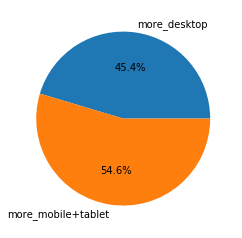

In [55]:
print(journeys.groupby('more_desktop').size())
plt.pie(journeys.groupby('more_desktop').size(), labels=['more_desktop', 'more_mobile+tablet'], autopct='%1.1f%%')

### journey length

EEK, be careful of frequency counts because need to include Occurences column for this. This is harder to interpret than it looks

In [56]:
journeys['page_seq_len'].describe()

count    344457.000000
mean          2.465719
std           1.790405
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max         122.000000
Name: page_seq_len, dtype: float64

In [57]:
#make a smaller copy of data with only 2 cols ready to make it really looooong
slim = journeys[['Occurrences','final_page','page_seq_len']].copy()
#repeat rows for each occurrence
journey_expanded =  slim.loc[slim.index.repeat(slim['Occurrences'])]


In [58]:
journey_expanded['page_seq_len'].describe()

count    1.901553e+06
mean     1.599764e+00
std      1.188207e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.220000e+02
Name: page_seq_len, dtype: float64

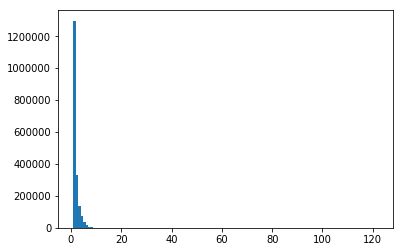

In [59]:
journey_expanded['page_seq_len'].hist(bins=122, grid=False)

~1/4 of journeys are greater than 3?

### Search counts

In [60]:
print("{}/{} ({}%) of journeys contain internal search in their path".format(journeys['contains_search_n'].sum(),
                                                                             journeys['Page_Seq_Occurrences'].sum(),
                                                                             journeys['contains_search_n'].sum()/journeys['Page_Seq_Occurrences'].sum()*100))

19297292.0/13591024301.0 (0.14198556026847914%) of journeys contain internal search in their path


In [215]:
data = []
for i in range(journeys['page_seq_len'].max()):
    df = journeys[journeys['page_seq_len']==i]
    percent = df['contains_search_n'].sum()/df['Page_Seq_Occurrences'].sum()*100
    n = df['contains_search_n'].sum()
    denom = df['Page_Seq_Occurrences'].sum()
    p = percent/100
    variance = (p*(1-p))/denom
    data.append([i+1, n, denom, percent, variance])

search_seqlength = pd.DataFrame(data, columns=['length', 'n', 'denom','percent', 'variance'])

TypeError: '>=' not supported between instances of 'str' and 'int'

In [62]:
search_seqlength.iloc[10:27]

,length,n,denom,percent,variance
10,11,71.0,11008.0,0.644985,5.821452e-07
11,12,60.0,8954.0,0.670092,7.433564e-07
12,13,13.0,4102.0,0.316919,7.701468e-07
13,14,13.0,1980.0,0.656566,3.294217e-06
14,15,13.0,1311.0,0.991609,7.488761e-06
15,16,13.0,984.0,1.321138,1.324882e-05
16,17,13.0,763.0,1.703801,2.194982e-05
17,18,11.0,597.0,1.842546,3.029475e-05
18,19,8.0,400.0,2.000000,4.900000e-05
19,20,8.0,363.0,2.203857,5.937429e-05


Text(0, 0.5, 'Percent of journeys used internal search')

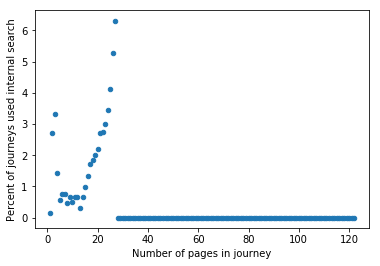

In [63]:
ax = search_seqlength.plot.scatter(x='length', y='percent')
ax.set_xlabel("Number of pages in journey")
ax.set_ylabel("Percent of journeys used internal search")

(0, 28)

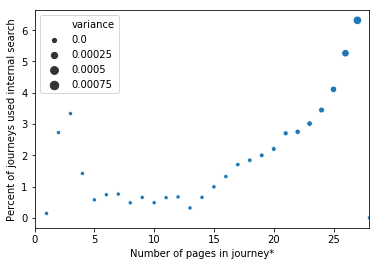

In [64]:
ax = sns.scatterplot(x="length", y="percent", size="variance", data=search_seqlength)
ax.set_xlabel("Number of pages in journey*")
ax.set_ylabel("Percent of journeys used internal search")
ax.set_xlim(0, 28)

In [65]:
longerthan3 = journeys[journeys['page_seq_len']>3]

print("{}/{} ({}%) of longerthan3 contain internal search in their path".format(longerthan3['contains_search_n'].sum(),
                                                                             longerthan3['Page_Seq_Occurrences'].sum(),
                                                                             longerthan3['contains_search_n'].sum()/longerthan3['Page_Seq_Occurrences'].sum()*100))

227442.0/16013489.0 (1.4203150856131352%) of longerthan3 contain internal search in their path


In [66]:
journeys[journeys['contains_search_regex']==1].page_seq_len.describe()

count    12092.000000
mean         3.193351
std          1.478206
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         27.000000
Name: page_seq_len, dtype: float64

In [67]:
journeys.page_seq_len.describe()

count    344457.000000
mean          2.465719
std           1.790405
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max         122.000000
Name: page_seq_len, dtype: float64

In [68]:
journeys['count_search'].describe()

count    344457.000000
mean          0.043997
std           0.258629
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: count_search, dtype: float64

In [69]:
journeys[journeys['contains_search_regex']==1].count_search.describe()

count    12092.000000
mean         1.253308
std          0.624343
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          9.000000
Name: count_search, dtype: float64

Text(0, 0.5, 'Number of journeys')

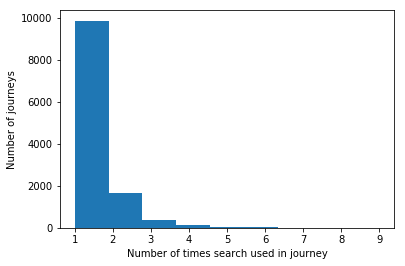

In [70]:
ax = journeys[journeys['contains_search_regex']==1].count_search.hist(bins=9, grid=False)
ax.set_xlabel("Number of times search used in journey")
ax.set_ylabel("Number of journeys")

In [214]:
longerthan10 = journeys[journeys['page_seq_len']>10]

TypeError: '>' not supported between instances of 'str' and 'int'

Text(0, 0.5, 'Number of journeys')

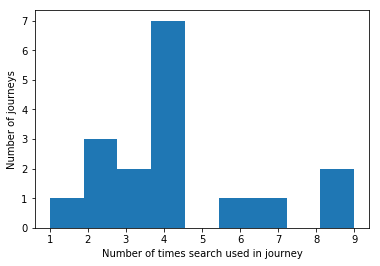

In [213]:
ax = longerthan10[longerthan10['contains_search_regex']==1].count_search.hist(bins=9, grid=False)
ax.set_xlabel("Number of times search used in journey")
ax.set_ylabel("Number of journeys")

In [73]:
longerthan10[longerthan10['contains_search_regex']==1].count_search.describe()

count    17.000000
mean      4.235294
std       2.305684
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       9.000000
Name: count_search, dtype: float64

In [74]:
longerthan10[longerthan10['contains_search_regex']==1].shape

(17, 26)

In [75]:
longerthan10.shape

(1080, 26)

### End page

In [76]:
def get_end_page(Page_List):          
    return pd.eval(Page_List)[-1]

journeys['final_page'] = journeys['Page_List'].map(get_end_page)

In [77]:
journeys['final_page'].nunique()

37749

In [78]:
journeys.shape

(344457, 26)

#### most frequent end pages

In [79]:
journey_expanded.groupby('final_page').size().describe()

count     37749.000000
mean         50.373599
std        1094.471563
min           1.000000
25%           2.000000
50%           3.000000
75%           9.000000
max      125106.000000
dtype: float64

In [80]:
journey_expanded.groupby('final_page').size().sort_values(ascending=False).iloc[0:50]

final_page
/log-in-register-hmrc-online-services                                                                                 125106
/check-mot-status                                                                                                      90713
/jobsearch                                                                                                             69823
/vehicle-tax                                                                                                           65423
/check-mot-history                                                                                                     55334
/national-minimum-wage-rates                                                                                           45749
/sign-in-universal-credit                                                                                              40401
/view-driving-licence                                                                                             

#### Most number of 'ways' of getting there

In [81]:
print("On average there are {} journeys per exit page; ways of getting there".format(journeys.shape[0]/journeys['final_page'].nunique()))

On average there are 9.124930461734087 journeys per exit page; ways of getting there


In [82]:
unique_page_sequences = journeys.drop_duplicates('Page_Seq_NL')

In [83]:
unique_page_sequences.groupby('final_page').size().describe()

count    37749.000000
mean         3.043763
std         16.324904
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       1179.000000
dtype: float64

In [84]:
pd.set_option('display.max_colwidth', -1)
unique_page_sequences[unique_page_sequences['final_page']=='/vehicle-tax'].head()

,Sequence,PageSequence,Occurrences,Page_Seq_Occurrences,DeviceCategories,Dates,Page_Event_List,Page_List,PageSequence_internal,Event_List,...,page_list_eval,page_seq_len,count_search,contains_search_regex,contains_search_n,final_page,desktop,mobile,other_device,more_desktop
1716338,/vehicle-tax<<PAGE<:<NULL<:<NULL>>/vehicle-tax<<EVENT<:<NULL<:<NULL>>/vehicle-tax<<PAGE<:<NULL<:<NULL>>/vehicle-tax<<EVENT<:<NULL<:<NULL>>/vehicle-tax<<EVENT<:<External Link Clicked<:<https://www.vehicletax.service.gov.uk>>/vehicle-tax<<PAGE<:<NULL<:<NULL>>/vehicle-tax<<EVENT<:<NULL<:<NULL>>/vehicle-tax<<EVENT<:<External Link Clicked<:<https://www.vehicletax.service.gov.uk,/vehicle-tax>>/vehicle-tax>>/vehicle-tax,1,12793.0,"[('desktop', 1)]","[('20181102', 1)]","[('/vehicle-tax', 'PAGE<:<NULL<:<NULL'), ('/vehicle-tax', 'EVENT<:<NULL<:<NULL'), ('/vehicle-tax', 'PAGE<:<NULL<:<NULL'), ('/vehicle-tax', 'EVENT<:<NULL<:<NULL'), ('/vehicle-tax', 'EVENT<:<External Link Clicked<:<https://www.vehicletax.service.gov.uk'), ('/vehicle-tax', 'PAGE<:<NULL<:<NULL'), ('/vehicle-tax', 'EVENT<:<NULL<:<NULL'), ('/vehicle-tax', 'EVENT<:<External Link Clicked<:<https://www.vehicletax.service.gov.uk')]","['/vehicle-tax', '/vehicle-tax', '/vehicle-tax']",/vehicle-tax>>/vehicle-tax>>/vehicle-tax,"[('PAGE_NULL', 'PAGE_NULL'), ('EVENT_NULL', 'EVENT_NULL'), ('PAGE_NULL', 'PAGE_NULL'), ('EVENT_NULL', 'EVENT_NULL'), ('External Link Clicked', 'https://www.vehicletax.service.gov.uk'), ('PAGE_NULL', 'PAGE_NULL'), ('EVENT_NULL', 'EVENT_NULL'), ('External Link Clicked', 'https://www.vehicletax.service.gov.uk')]",...,"[/vehicle-tax, /vehicle-tax, /vehicle-tax]",3,0,0,0.0,/vehicle-tax,1,0,0,1
847536,/financial-help-disabled/vehicles-and-transport<<PAGE<:<NULL<:<NULL>>/vehicle-tax<<PAGE<:<NULL<:<NULL>>/vehicle-tax<<EVENT<:<External Link Clicked<:<http://www.postoffice.co.uk/branch-finder>>/vehicle-tax<<PAGE<:<NULL<:<NULL,/financial-help-disabled/vehicles-and-transport>>/vehicle-tax>>/vehicle-tax,1,4.0,"[('mobile', 1)]","[('20181029', 1)]","[('/financial-help-disabled/vehicles-and-transport', 'PAGE<:<NULL<:<NULL'), ('/vehicle-tax', 'PAGE<:<NULL<:<NULL'), ('/vehicle-tax', 'EVENT<:<External Link Clicked<:<http://www.postoffice.co.uk/branch-finder'), ('/vehicle-tax', 'PAGE<:<NULL<:<NULL')]","['/financial-help-disabled/vehicles-and-transport', '/vehicle-tax', '/vehicle-tax']",/financial-help-disabled/vehicles-and-transport>>/vehicle-tax>>/vehicle-tax,"[('PAGE_NULL', 'PAGE_NULL'), ('PAGE_NULL', 'PAGE_NULL'), ('External Link Clicked', 'http://www.postoffice.co.uk/branch-finder'), ('PAGE_NULL', 'PAGE_NULL')]",...,"[/financial-help-disabled/vehicles-and-transport, /vehicle-tax, /vehicle-tax]",3,0,0,0.0,/vehicle-tax,0,1,0,0
156517,/car-tax-disc-without-v11-reminder<<PAGE<:<NULL<:<NULL>>/car-tax-disc-without-v11-reminder<<EVENT<:<breadcrumbClicked<:<1>>/<<PAGE<:<NULL<:<NULL>>/vehicle-tax<<PAGE<:<NULL<:<NULL,/car-tax-disc-without-v11-reminder>>/>>/vehicle-tax,1,22.0,"[('mobile', 1)]","[('20181031', 1)]","[('/car-tax-disc-without-v11-reminder', 'PAGE<:<NULL<:<NULL'), ('/car-tax-disc-without-v11-reminder', 'EVENT<:<breadcrumbClicked<:<1'), ('/', 'PAGE<:<NULL<:<NULL'), ('/vehicle-tax', 'PAGE<:<NULL<:<NULL')]","['/car-tax-disc-without-v11-reminder', '/', '/vehicle-tax']",/car-tax-disc-without-v11-reminder>>/>>/vehicle-tax,"[('PAGE_NULL', 'PAGE_NULL'), ('breadcrumbClicked', '1'), ('PAGE_NULL', 'PAGE_NULL'), ('PAGE_NULL', 'PAGE_NULL')]",...,"[/car-tax-disc-without-v11-reminder, /, /vehicle-tax]",3,0,0,0.0,/vehicle-tax,0,1,0,0
480601,/government/publications/v890-statutory-off-road-notification-sorn<<EVENT<:<user_satisfaction_survey<:<banner_shown>>/government/publications/v890-statutory-off-road-notification-sorn<<PAGE<:<NULL<:<NULL>>/make-a-sorn<<PAGE<:<NULL<:<NULL>>/make-a-sorn<<EVENT<:<External Link Clicked<:<https://www.sorn.service.gov.uk>>/vehicle-tax<<PAGE<:<NULL<:<NULL>>/vehicle-tax<<EVENT<:<External Link Clicked<:<https://www.vehicletax.service.gov.uk,/government/publications/v890-statutory-off-

In [196]:
unique_page_sequences.groupby('final_page').size().sort_values(ascending=False).iloc[100:150]

final_page
/change-name-address-v5c                                                                                     87
/government/publications/national-insurance-get-your-national-insurance-number-in-writing-ca5403             87
/done/vehicle-tax                                                                                            85
/government/organisations/hm-revenue-customs/contact                                                         85
/calculate-vehicle-tax-rates                                                                                 85
/change-name-address-v5c?step-by-step-nav=c1f13d41-ed7f-44a3-be11-fd95525ddf40                               85
/get-a-passport-urgently/1-week-fast-track-service                                                           85
/file-changes-to-a-company-with-companies-house                                                              84
/pay-self-assessment-tax-bill/by-debit-or-credit-card-online                                 

In [209]:
journeys['final_page_type'] = 'other'
journeys.loc[journeys['final_page'].str.contains('/government/publications/', 'final_page_type')] = 'government_publication'
journeys.loc[journeys['final_page'].str.contains('log-in', 'final_page_type')] = 'login'
journeys.loc[journeys['final_page'].str.contains('sign-in', 'final_page_type')] = 'login'
journeys.loc[journeys['final_page'].str.contains('login', 'final_page_type')] = 'login'
journeys.loc[journeys['final_page'].str.contains('check', 'final_page_type')] = 'check_a_thing'
journeys.loc[journeys['final_page'].str.contains('apply', 'final_page_type')] = 'apply'
journeys.loc[journeys['final_page'].str.contains('contact', 'final_page_type')] = 'contact/enquiries'
journeys.loc[journeys['final_page'].str.contains('enquiries', 'final_page_type')] = 'contact/enquiries'
journeys.loc[journeys['final_page'].str.contains(r'get-.*-information.*', 'final_page_type')] = 'get_information'
journeys.loc[journeys['final_page'].str.contains('send', 'final_page_type')] = 'send'
journeys.loc[journeys['final_page'].str.contains('find', 'final_page_type')] = 'find'
journeys.loc[journeys['final_page'].str.contains('calculat', 'final_page_type')] = 'calculate/calculator'
journeys.loc[journeys['final_page'].str.contains('order', 'final_page_type')] = 'order'
journeys.loc[journeys['final_page'].str.contains('manage', 'final_page_type')] = 'manage'
journeys.loc[journeys['final_page'].str.contains('update', 'final_page_type')] = 'update'
journeys.loc[journeys['final_page'].str.contains('eligibility', 'final_page_type')] = 'eligibility'
journeys.loc[journeys['final_page'].str.contains('estimate', 'final_page_type')] = 'estimate'
journeys.loc[journeys['final_page'].str.contains('renew', 'final_page_type')] = 'renew'
journeys.loc[journeys['final_page'].str.contains('pay', 'final_page_type')] = 'pay'
journeys.loc[journeys['final_page'].str.contains('claim', 'final_page_type')] = 'claim'
journeys.loc[journeys['final_page'].str.contains('change', 'final_page_type')] = 'change'

In [210]:
journeys.groupby('final_page_type').size()

final_page_type
apply                   18352 
calculate/calculator    4737  
change                  13557 
check_a_thing           64424 
claim                   4122  
contact/enquiries       8557  
eligibility             2131  
estimate                277   
find                    4555  
login                   22819 
manage                  7832  
order                   797   
other                   178762
pay                     8954  
renew                   1484  
send                    1791  
update                  1306  
dtype: int64

(         final_page_type  Page_Seq_NL    percent
 7   estimate              277          0.080416 
 11  order                 797          0.231379 
 16  update                1306         0.379147 
 14  renew                 1484         0.430823 
 15  send                  1791         0.519949 
 6   eligibility           2131         0.618655 
 4   claim                 4122         1.196666 
 8   find                  4555         1.322371 
 1   calculate/calculator  4737         1.375208 
 10  manage                7832         2.273724 
 5   contact/enquiries     8557         2.484200 
 13  pay                   8954         2.599454 
 2   change                13557        3.935760 
 0   apply                 18352        5.327806 
 9   login                 22819        6.624629 
 3   check_a_thing         64424        18.703060
 12  other                 178762       51.896753,
 <matplotlib.axes._subplots.AxesSubplot at 0x14e9ab4e0>)

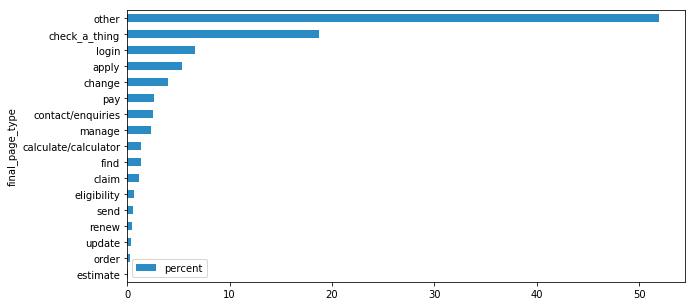

In [211]:
groupby_percent(journeys, 'final_page_type', 'Page_Seq_NL')

#### Final interaction with GOV.UK

In [101]:
def get_end_page_event(Page_Event_List):          
    return pd.eval(Page_Event_List)[-1][-1]

journeys['final_interaction'] = journeys['Page_Event_List'].map(get_end_page_event)

In [133]:
journeys.final_interaction.head()

174574     EVENT<:<External Link Clicked<:<https://www.check-mot.service.gov.uk/?_ga=2.231307103.1553813127.1540963131-401800498.1535917021                                                                                                      
81749      EVENT<:<External Link Clicked<:<https://www.tax.service.gov.uk/gg/sign-in?continue=/tax-credits-service/renewals/service-router&accountType=individual&origin=PTA-taxcredits&_ga=2.38933092.631798528.1540994595-1142209552.1523917181
1508443    PAGE<:<NULL<:<NULL                                                                                                                                                                                                                    
982108     EVENT<:<External Link Clicked<:<https://www.check-mot.service.gov.uk/?_ga=2.229377244.1925288140.1540810553-1502028329.1439554127                                                                                                     
1194381    EVENT<:<External Link

In [144]:
journeys['final_interaction_type'] = journeys.final_interaction.str.extract(r'<:<(.*)<:<', expand=False)

In [155]:
journeys['final_external_link'] = journeys.final_interaction.str.extract(r'EVENT<:<External Link Clicked<:(.*)', expand=False)

In [163]:
journeys['exit_to_assessed_service'] = np.where(journeys['final_external_link'].str.contains(r'.*service.gov.uk.*', na=False), 1, 0)

In [167]:
journeys['exit_to_assessed_service'].value_counts(normalize=True)

0    0.642388
1    0.357612
Name: exit_to_assessed_service, dtype: float64

In [168]:
#make a smaller copy of data with only 2 cols ready to make it really looooong
slim = journeys[['Occurrences','exit_to_assessed_service']].copy()
#repeat rows for each occurrence
journey_expanded2 =  slim.loc[slim.index.repeat(slim['Occurrences'])]

In [170]:
journey_expanded2['exit_to_assessed_service'].value_counts(normalize=True)

0    0.711194
1    0.288806
Name: exit_to_assessed_service, dtype: float64

([<matplotlib.patches.Wedge at 0x13f4dadd8>,
 [Text(-0.6774532626465782, 0.8666354925396874, 'did not exit to an assessed service'),
  Text(0.6774533437868462, -0.8666354291119314, 'exited to an assessed service')],
 [Text(-0.36951996144358806, 0.47271026865801125, '71.1%'),
  Text(0.36952000570191607, -0.4727102340610534, '28.9%')])

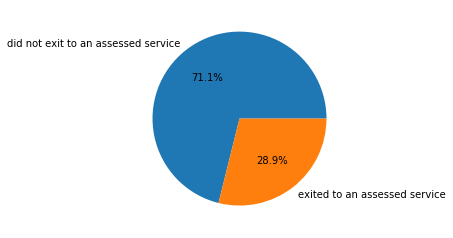

In [172]:
plt.pie(journey_expanded2['exit_to_assessed_service'].value_counts(), labels=['did not exit to an assessed service', 'exited to an assessed service'], autopct='%1.1f%%')

In [ ]:
journeys['final_external_link_service'] = np.where(journeys.final_interaction.str.contains(r'<External Link Clicked<:(.*)', expand=False)

In [145]:
def groupby_percent(df, groupby_var, unit_var, figsize=(10, 5)):
    x = df.groupby(groupby_var).count().reset_index()
    x['percent'] = 100*x[unit_var]/x[unit_var].sum()
    x = x.sort_values(['percent'])

    s = pd.DataFrame(x[[groupby_var, unit_var,'percent']])

    return(s, x.plot(x=groupby_var, y='percent', kind='barh', figsize=figsize, color='#2B8CC4'))


(                      final_interaction_type  PageSequence    percent
 26  navLeafLinkClicked                        1             0.000290 
 39  servicesDocumentListClicked               1             0.000290 
 35  ppServices                                1             0.000290 
 31  policyAndEngagementHighlightBoxClicked    1             0.000290 
 29  newsAndCommunicationsDocumentListClicked  1             0.000290 
 22  manualFeedbackForm                        1             0.000290 
 18  guidanceAndRegulationHighlightBoxClicked  1             0.000290 
 44  stepNavPartOfClicked                      1             0.000290 
 28  navSubtopicLinkClicked                    2             0.000581 
 17  guidanceAndRegulationDocumentListClicked  2             0.000581 
 42  stepNavHeaderClicked                      2             0.000581 
 47  userAlerts:licence                        2             0.000581 
 21  home_office_research_survey_3             3             0.000871 
 25  n

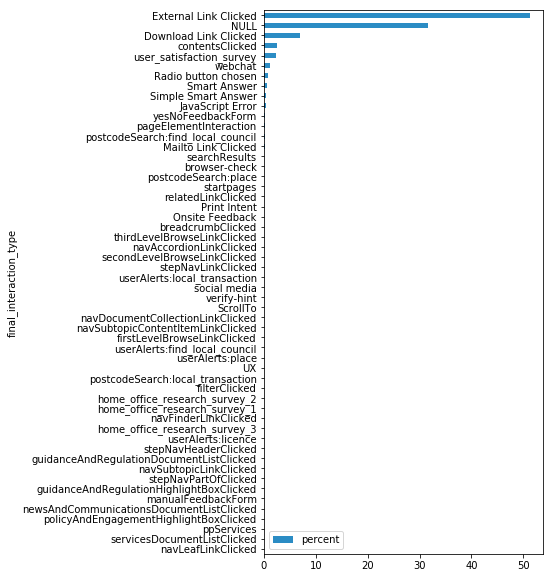

In [152]:
groupby_percent(journeys, 'final_interaction_type', 'PageSequence', figsize=(5, 10))

In [140]:
journeys.groupby('final_interaction_type').size().sort_values(ascending=False)

final_interaction_type
External Link Clicked                       176371
NULL                                        108746
Download Link Clicked                       23942 
contentsClicked                             8963  
user_satisfaction_survey                    8391  
webchat                                     4288  
Radio button chosen                         2919  
Smart Answer                                1794  
Simple Smart Answer                         1659  
JavaScript Error                            1434  
yesNoFeedbackForm                           995   
pageElementInteraction                      990   
postcodeSearch:find_local_council           859   
Mailto Link Clicked                         667   
searchResults                               320   
browser-check                               319   
postcodeSearch:place                        233   
startpages                                  175   
relatedLinkClicked                          169   
Print In

In [116]:
print(journeys[journeys['final_interaction']=='PAGE<:<NULL<:<NULL'].shape)

print("{} out of {} ({}%) journeys ended in a page hit".format(journeys[journeys['final_interaction']=='PAGE<:<NULL<:<NULL'].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction']=='PAGE<:<NULL<:<NULL'].shape[0]/journeys.shape[0]*100))

(104629, 27)
104629 out of 344457 (30.375054070609686%) journeys ended in a page hit


In [113]:
print(journeys[journeys['final_interaction'].str.startswith('EVENT<:<External Link Clicked')].shape)

print("{} out of {} ({}%) journeys ended in an external link clicked".format(journeys[journeys['final_interaction'].str.startswith('EVENT<:<External Link Clicked')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.startswith('EVENT<:<External Link Clicked')].shape[0]/journeys.shape[0]*100))

(176371, 27)
176371 out of 344457 (51.20261745297672%) journeys ended in an external link clicked


In [128]:
print(journeys[journeys['final_interaction'].str.startswith('EVENT<:<External Link Clicked')].shape)

print("{} out of {} ({}%) journeys ended in an specialist external link clicked".format(journeys[journeys['final_interaction'].str.startswith('EVENT<:<Specialist-external-link')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.startswith('EVENT<:<Specialist-external-link')].shape[0]/journeys.shape[0]*100))

(176371, 27)
0 out of 344457 (0.0%) journeys ended in an specialist external link clicked


In [129]:
print("{} out of {} ({}%) journeys ended in aSpecialist-external-link".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<Specialist-external-link')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<Specialist-external-link')].shape[0]/journeys.shape[0]*100))

0 out of 344457 (0.0%) journeys ended in aSpecialist-external-link


In [115]:
print("{} out of {} ({}%) journeys ended in an download link clicked".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<Download Link Clicked')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<Download Link Clicked')].shape[0]/journeys.shape[0]*100))

23942 out of 344457 (6.950649863408205%) journeys ended in an download link clicked


In [118]:
print("{} out of {} ({}%) journeys ended in a  contents clicked".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<contentsClicked<')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<contentsClicked<')].shape[0]/journeys.shape[0]*100))

8963 out of 344457 (2.602066440803932%) journeys ended in a  contents clicked


In [121]:
print("{} out of {} ({}%) journeys ended in a breadcrumbClicked".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<breadcrumbClicked<')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<breadcrumbClicked<')].shape[0]/journeys.shape[0]*100))

110 out of 344457 (0.03193431981350357%) journeys ended in a breadcrumbClicked


In [123]:
print("{} out of {} ({}%) journeys ended in a JavaScript Error".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<JavaScript Error<')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<JavaScript Error<')].shape[0]/journeys.shape[0]*100))

1434 out of 344457 (0.4163074055687647%) journeys ended in a JavaScript Error


In [126]:
print("{} out of {} ({}%) journeys ended in a Simple Smart Answer".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<Simple Smart Answer<')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<Simple Smart Answer<')].shape[0]/journeys.shape[0]*100))

1659 out of 344457 (0.4816276051872948%) journeys ended in a Simple Smart Answer


In [125]:
print("{} out of {} ({}%) journeys ended in a Smart Answer".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<Smart Answer<')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<Smart Answer<')].shape[0]/journeys.shape[0]*100))

1794 out of 344457 (0.5208197249584128%) journeys ended in a Smart Answer


In [127]:
print("{} out of {} ({}%) journeys ended in a social media".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<social media<')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<social media<')].shape[0]/journeys.shape[0]*100))

74 out of 344457 (0.021483087874538766%) journeys ended in a social media


In [131]:
print("{} out of {} ({}%) journeys ended in yesNoFeedbackForm".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<yesNoFeedbackForm<')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<yesNoFeedbackForm<')].shape[0]/journeys.shape[0]*100))

995 out of 344457 (0.288860438313055%) journeys ended in yesNoFeedbackForm
